In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [68]:
data = pd.read_csv('Data.csv')
data.head()

,Floor_flat,Price
0,1.1,69.33
1,1.3,66.25
2,1.5,67.71
3,2.0,53.52
4,2.2,39.81


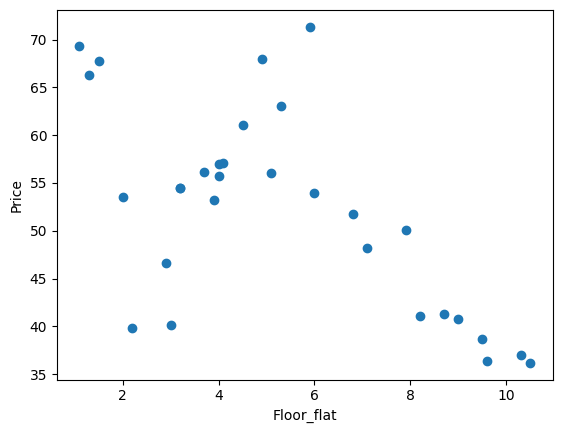

In [69]:
X = data['Floor_flat']
y = data['Price']

# plot data
plt.scatter(X, y)
plt.xlabel('Floor_flat')
plt.ylabel('Price')
plt.show()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_poly9d = np.array([X_train**i for i in range(1, 10)]).T

def W(t):
    return np.linalg.inv(X_train_poly9d.T.dot(X_train_poly9d) + t*np.identity(9)).dot(X_train_poly9d.T).dot(y_train)

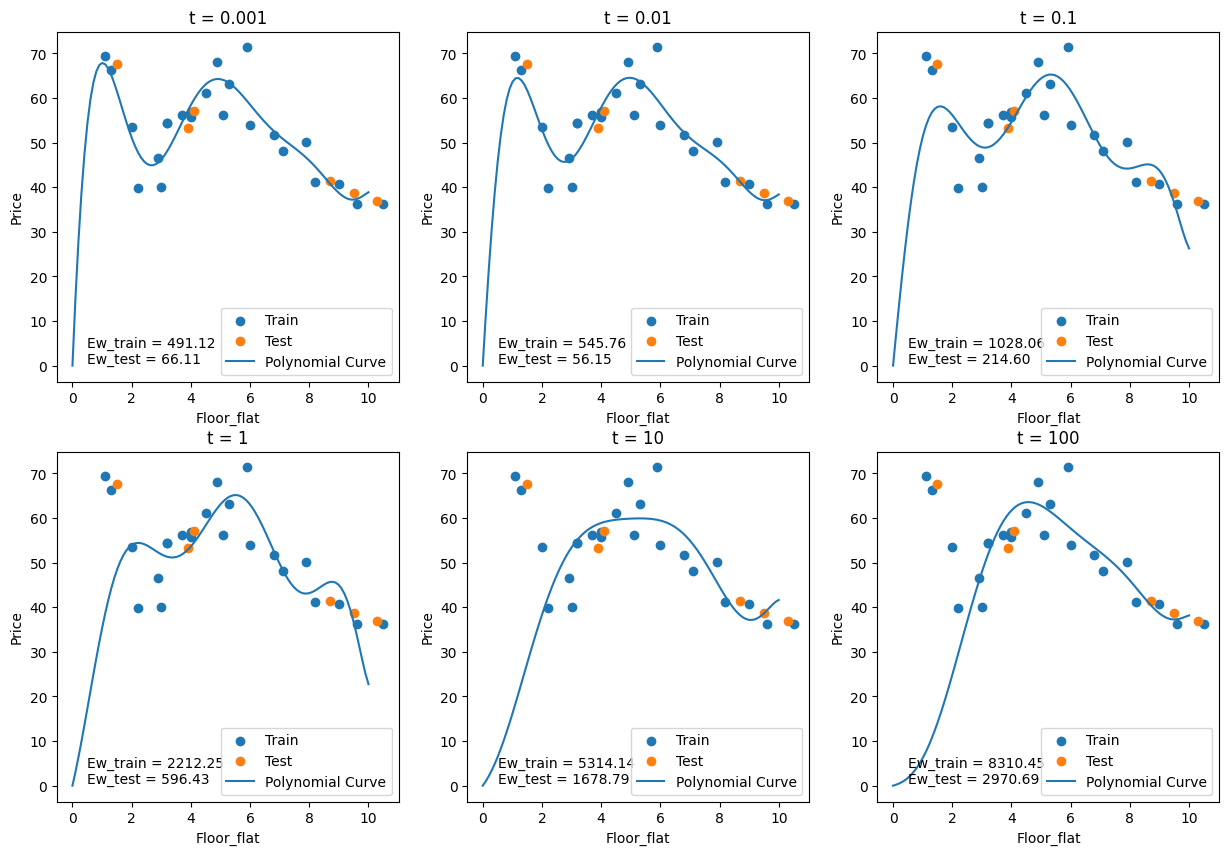

In [113]:
t = [0.001, 0.01, 0.1, 1, 10, 100]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for k in range(6):
    i = k // 3
    j = k % 3

    w = W(t[k])
    x = np.linspace(0, 10, 100)

    y_train_pred = np.array([X_train**k for k in range(1, 10)]).T.dot(w)
    y_test_pred = np.array([X_test**k for k in range(1, 10)]).T.dot(w)
    y_pred = np.array([x**k for k in range(1, 10)]).T.dot(w)

    Ew_train = np.sum((y_train - y_train_pred)**2) 
    Ew_test = np.sum((y_test - y_test_pred)**2) 

    axs[i, j].scatter(X_train, y_train, label='Train')
    axs[i, j].scatter(X_test, y_test, label='Test')
    axs[i, j].plot(x, y_pred, label='Polynomial Curve')
    axs[i, j].set_title('t = {}'.format(t[k]))
    axs[i, j].set_xlabel('Floor_flat')
    axs[i, j].set_ylabel('Price')
    axs[i, j].text(0.5, 0.5, 'Ew_train = {:.2f}\nEw_test = {:.2f}'.format(Ew_train, Ew_test))
    axs[i, j].legend()

plt.show()
